<a href="https://colab.research.google.com/github/nrmoolsarn/DS/blob/main/Mini_Project_on_Early_stage_diabetes_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Retrieve Data
Data Source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset

a.	Students have to perform either classification or regression on the dataset.

b.	The dataset can be your dataset or open datasets. The data must not be older than 3 years. The number of dimensions must not be less than 10 and the size of the dataset must not be less than 500 records.

e.	Students must apply at least 2 performance measurements on the results with interpretation.


In [28]:
#general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Implement 2 non-neural-network machine learning models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#performance measurements
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

#Implement 2 artificial neural networks
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


#EDA

In [3]:
#general infomation
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
#find null
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
#check for number of possible value in each column.
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [6]:
#looking for missing value by find the unique value in each column.
for col in list(df):
    print(col)
    print(df[col].unique())

Age
[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Gender
['Male' 'Female']
Polyuria
['No' 'Yes']
Polydipsia
['Yes' 'No']
sudden weight loss
['No' 'Yes']
weakness
['Yes' 'No']
Polyphagia
['No' 'Yes']
Genital thrush
['No' 'Yes']
visual blurring
['No' 'Yes']
Itching
['Yes' 'No']
Irritability
['No' 'Yes']
delayed healing
['Yes' 'No']
partial paresis
['No' 'Yes']
muscle stiffness
['Yes' 'No']
Alopecia
['Yes' 'No']
Obesity
['Yes' 'No']
class
['Positive' 'Negative']


In [7]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [8]:
#transform to binary
#Yes = 1 , No = 0
#Male = 1 , Female = 0
#Positive = 1 , Negative = 0
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)
df.replace('Male',1,inplace=True)
df.replace('Female',0,inplace=True)
df.replace('Positive',1,inplace=True)
df.replace('Negative',0,inplace=True)

In [9]:
#review dataframe after transfrom
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [10]:
#recheck after transform.
for col in list(df):
    print(col)
    print(df[col].unique())

Age
[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Gender
[1 0]
Polyuria
[0 1]
Polydipsia
[1 0]
sudden weight loss
[0 1]
weakness
[1 0]
Polyphagia
[0 1]
Genital thrush
[0 1]
visual blurring
[0 1]
Itching
[1 0]
Irritability
[0 1]
delayed healing
[1 0]
partial paresis
[0 1]
muscle stiffness
[1 0]
Alopecia
[1 0]
Obesity
[1 0]
class
[1 0]


In [11]:
#recheck after transform.
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

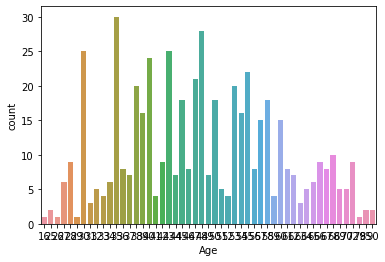

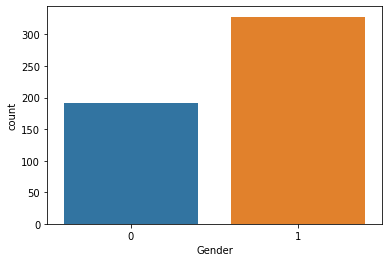

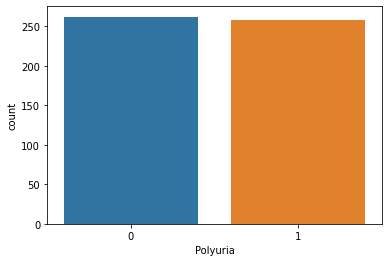

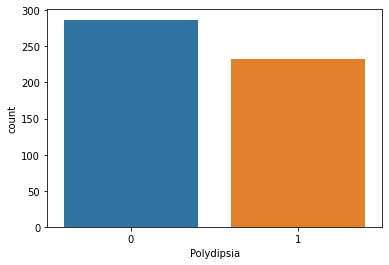

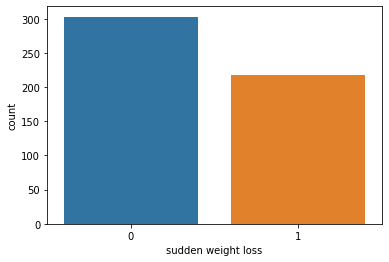

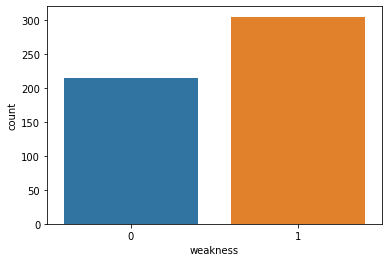

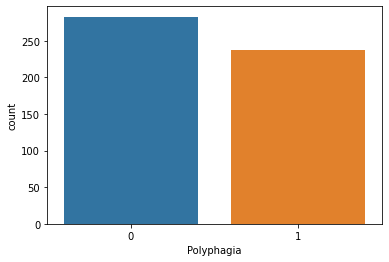

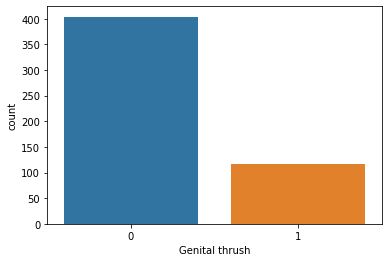

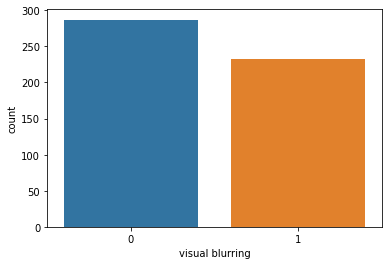

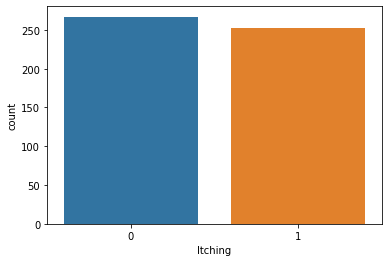

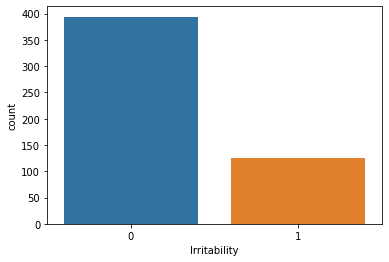

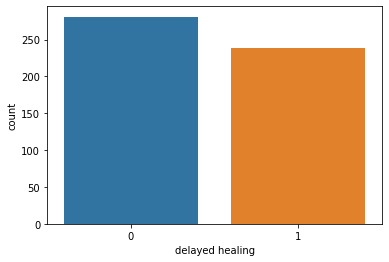

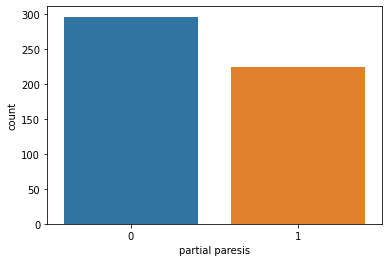

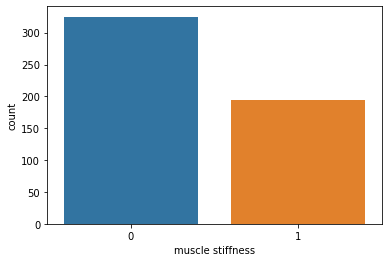

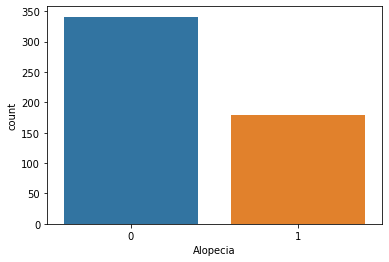

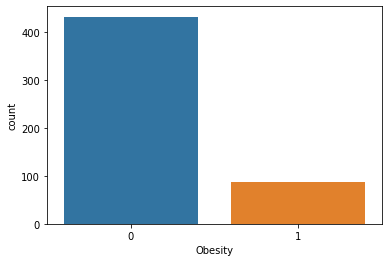

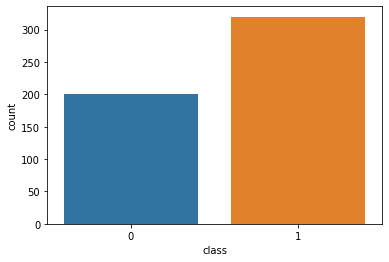

In [12]:
#plot for distribution
#Yes = 1 , No = 0
#Male = 1 , Female = 0
#Positive = 1 , Negative = 0

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

In [13]:
#rename dataset name for not confusion with before clean data
data = df
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [14]:
cor = data.corrwith(df['class'])
cor

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
class                 1.000000
dtype: float64

In [15]:
#split train/test
X = data.iloc[:,:16]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

#Implement 2 non-neural-network machine learning models

d. Students have to use at least 2 different non-neural-network machine learning models on the same dataset in order to compare the performance. The model must already be fine-tuned using parameter optimization technique.

**1. SVM from sklearn.model**

In [16]:
#tuning hyper-parem for SVM using GrideSearCV
parameters = {
    'kernel': ('linear','rbf','sigmoid'),
    'gamma' : ('scale' , 'auto'),
    'C' : (np.arange(0,10,0.5))
              }
svm_model = GridSearchCV(SVC(), parameters, cv=5,n_jobs=-1,verbose=10)
svm_model.fit(X_train, y_train)
print(svm_model.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1732s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0153s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0375s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1533s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:    8.3s


{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    9.8s finished


In [17]:
#run model with best param.
best_model = SVC(kernel='linear', gamma ='scale', C=1, verbose =True, probability=True)
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)  

mae = mean_absolute_error(y_test, y_test_pred)
print(' Best mode return MAE of:', mae)

[LibSVM] Best mode return MAE of: 0.11046511627906977


In [18]:
#Positive = 1 , Negative = 0
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        66
           1       0.94      0.88      0.91       106

    accuracy                           0.89       172
   macro avg       0.88      0.89      0.89       172
weighted avg       0.89      0.89      0.89       172



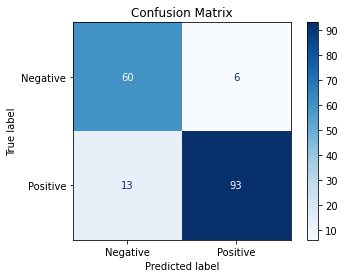

In [19]:
#plot confusion metrix
class_names = ['Negative','Positive']
plot = plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues , display_labels=class_names, values_format='d')
plot.ax_.set_title('Confusion Matrix')
plt.show()

**2. K-fold cross validation on KNN**

In [20]:
#tuning parem for KNN using GrideSearCV
parameter_grid = {'n_neighbors': np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameter_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.cv_results_

{'mean_fit_time': array([0.00241041, 0.00207629, 0.00280623, 0.00186939, 0.00191655,
        0.00181112, 0.00182953, 0.00177946, 0.00171175, 0.00235381]),
 'mean_score_time': array([0.00393515, 0.00400953, 0.0042264 , 0.00375113, 0.00363741,
        0.00366092, 0.00387316, 0.00373888, 0.00362315, 0.00439596]),
 'mean_test_score': array([0.89652174, 0.82761905, 0.84182195, 0.8247205 , 0.83341615,
        0.79304348, 0.79871636, 0.79010352, 0.7957764 , 0.79018634]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10}],
 'rank_test_score': array([ 1,  4,  2,  5,  3,  8,  6, 10,  7, 

In [21]:
#result
mean_test_score = list(knn_cv.cv_results_['mean_test_score'])
for i in range(len(mean_test_score)):
  print('Mean Cross-Validation Score of', i+1, 'Nearest Neighbors is', mean_test_score[i])

Mean Cross-Validation Score of 1 Nearest Neighbors is 0.8965217391304348
Mean Cross-Validation Score of 2 Nearest Neighbors is 0.8276190476190477
Mean Cross-Validation Score of 3 Nearest Neighbors is 0.8418219461697722
Mean Cross-Validation Score of 4 Nearest Neighbors is 0.82472049689441
Mean Cross-Validation Score of 5 Nearest Neighbors is 0.833416149068323
Mean Cross-Validation Score of 6 Nearest Neighbors is 0.7930434782608696
Mean Cross-Validation Score of 7 Nearest Neighbors is 0.7987163561076605
Mean Cross-Validation Score of 8 Nearest Neighbors is 0.790103519668737
Mean Cross-Validation Score of 9 Nearest Neighbors is 0.795776397515528
Mean Cross-Validation Score of 10 Nearest Neighbors is 0.7901863354037267


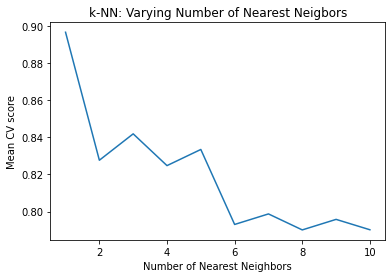

In [22]:
#plot for visualization
plt.title('k-NN: Varying Number of Nearest Neigbors')
plt.plot(list(range(1,11)), mean_test_score)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Mean CV score')
plt.show()

In [23]:
#find and define best param
knn_cv.best_params_
print(knn_cv.best_params_)
best_param = knn_cv.best_params_['n_neighbors']

{'n_neighbors': 1}


In [24]:
#run model with best param
knn_optimal = KNeighborsClassifier(n_neighbors=best_param)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)
print(classification_report(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)
print(' Best mode return MAE of:', mae)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        66
           1       0.96      0.92      0.94       106

    accuracy                           0.93       172
   macro avg       0.92      0.93      0.93       172
weighted avg       0.93      0.93      0.93       172

 Best mode return MAE of: 0.06976744186046512


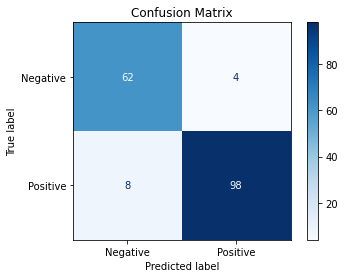

In [25]:
#plot confusion metrix
class_names = ['Negative','Positive']
plot = plot_confusion_matrix(knn_optimal, X_test, y_test, cmap=plt.cm.Blues , display_labels=class_names, values_format='d')
plot.ax_.set_title('Confusion Matrix')
plt.show()

#Implement 2 artificial neural networks

c.	Students have to use at least 2 artificial neural networks implementing by sklearn and keras. If they use pytorch or another tool as an additional tool, they will receive bonus score. The model must already be fine-tuned using parameter optimization technique.

f.	Students must perform at least 2 experiments on the impact of parameters on the performance of the neural network model.  Some of the sample experiments are 1) impact of learning rate on the convergence of the model 2) impact of initial weight on the performance or 3) impact of dimension reduction technique on the performance of the models.

In [29]:
#tuning parem for MLPClassifier using GrideSearCV and run model
parameters = {
    'learning_rate' : ['constant','adaptive'],\
    'hidden_layer_sizes' : [50,100,150,200],\
    'max_iter' : (50,100,150,200),\
    'activation' : ['tanh','relu']
}
clf = GridSearchCV(MLPClassifier(),parameters,n_jobs=-1, cv=5, verbose=10)
clf.fit(X, y)
y_pred = clf.predict(X)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...ffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activat

In [35]:
#print result
print(classification_report(y,y_pred))

mae = mean_absolute_error(y, y_pred)
print(' Best mode return MAE of:', mae)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       200
           1       0.98      0.98      0.98       320

    accuracy                           0.98       520
   macro avg       0.98      0.98      0.98       520
weighted avg       0.98      0.98      0.98       520

 Best mode return MAE of: 0.023076923076923078


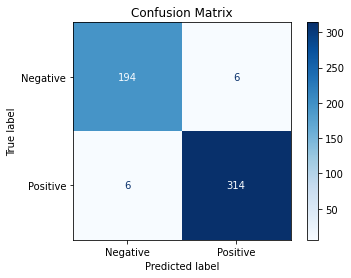

In [34]:
#plot confusion metrix
class_names = ['Negative','Positive']
plot = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues , display_labels=class_names, values_format='d')
plot.ax_.set_title('Confusion Matrix')
plt.show()